<a href="https://colab.research.google.com/github/sasquare/Google_Data_Analytics/blob/main/bikeshare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
# Pandas allows importing data from various file formats and also allow various data manipulation.
# Numpy can be used for mathematical and statiscal operation
# Matplotlib and Seaborn are both used to create visualization.
# Datetime - These classes provide a number of functions to deal with dates, times and time intervals.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from datetime import datetime
from datetime import timedelta
import time

the operation below merged our data into a single file

In [ ]:
df = pd.concat(
    map(pd.read_csv,['/content/drive/MyDrive/CLEAN DAT/df1.csv',
                     '/content/drive/MyDrive/CLEAN DAT/df2.csv',
                     '/content/drive/MyDrive/CLEAN DAT/df3.csv',
                     '/content/drive/MyDrive/CLEAN DAT/df4.csv',
                     '/content/drive/MyDrive/CLEAN DAT/df5.csv',
                     '/content/drive/MyDrive/CLEAN DAT/df6.csv',
                     '/content/drive/MyDrive/CLEAN DAT/df7.csv', 
                     '/content/drive/MyDrive/CLEAN DAT/df8.csv',
                     '/content/drive/MyDrive/CLEAN DAT/df9.csv', 
                     '/content/drive/MyDrive/CLEAN DAT/df10.csv',
                     '/content/drive/MyDrive/CLEAN DAT/df11.csv',
                     '/content/drive/MyDrive/CLEAN DAT/df12.csv']), ignore_index= True
)

In [ ]:
#overview of the first 10 row our data
df.head(5)

,ride_id,rideable_type,started_at,started_time,ended_at,ended_time,start_station_name,end_station_name,member_casual,ride_length,weekday,month
0,E19E6F1B8D4C42ED,electric_bike,1/23/2021,4:14:19 PM,1/23/2021,4:24:44 PM,California Ave & Cortez St,NaN,member,625,7,Jan
1,DC88F20C2C55F27F,electric_bike,1/27/2021,6:43:08 PM,1/27/2021,6:47:12 PM,California Ave & Cortez St,NaN,member,244,4,Jan
2,EC45C94683FE3F27,electric_bike,1/21/2021,10:35:54 PM,1/21/2021,10:37:14 PM,California Ave & Cortez St,NaN,member,80,5,Jan
3,4FA453A75AE377DB,electric_bike,1/7/2021,1:31:13 PM,1/7/2021,1:42:55 PM,California Ave & Cortez St,NaN,member,702,5,Jan
4,BE5E8EB4E7263A0B,electric_bike,1/23/2021,2:24:02 AM,1/23/2021,2:24:45 AM,California Ave & Cortez St,NaN,casual,43,7,Jan


In [ ]:
#overview of the last 10 row our data
df.tail(5)

,ride_id,rideable_type,started_at,started_time,ended_at,ended_time,start_station_name,end_station_name,member_casual,ride_length,weekday,month
5568663,51356F0EAD3B60BC,electric_bike,12/10/2021,11:39:19 PM,12/11/2021,12:00:03 AM,NaN,Damen Ave & Foster Ave,member,85156,6,Dec
5568664,652449A8854B21A2,electric_bike,12/6/2021,11:50:59 PM,12/7/2021,12:00:02 AM,Clinton St & Tilden St,NaN,casual,85857,2,Dec
5568665,81D4E6D06574AB1A,classic_bike,12/13/2021,11:46:36 PM,12/14/2021,12:00:02 AM,Franklin St & Monroe St,Clark St & Schiller St,member,85594,2,Dec
5568666,01B1C63CA38FD728,electric_bike,12/13/2021,11:24:39 PM,12/14/2021,12:00:02 AM,NaN,NaN,casual,84277,2,Dec
5568667,B5320704500E5A82,classic_bike,12/18/2021,11:54:32 PM,12/19/2021,12:00:00 AM,Clark St & Wellington Ave,DuSable Lake Shore Dr & Belmont Ave,member,86072,7,Dec


In [ ]:
#getting the shape and length of our data
df.shape

(5568668, 12)

In [ ]:
len(df)

5568668

In [ ]:
#checking for null value
df.isnull().any()

ride_id               False
rideable_type         False
started_at            False
started_time          False
ended_at              False
ended_time            False
start_station_name     True
end_station_name       True
member_casual         False
ride_length           False
weekday               False
month                 False
dtype: bool

In [ ]:
#getting the total num of null value
df.isnull().values.sum()

1410849

In [ ]:
#checking for duplicate
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
5568663    False
5568664    False
5568665    False
5568666    False
5568667    False
Length: 5568668, dtype: bool

In [ ]:
#checking the data type
print(df.dtypes)

ride_id               object
rideable_type         object
started_at            object
started_time          object
ended_at              object
ended_time            object
start_station_name    object
end_station_name      object
member_casual         object
ride_length            int64
weekday                int64
month                 object
dtype: object


***Time for Analysis.
we will now***

*  Agreegate the Data
*  Format the data
*   Analyze the data
*   perform some calculation 



In [ ]:
#converting the start and end date to datetime format
df[['started_at','ended_at']] = df[['started_at','ended_at']].apply(pd.to_datetime)

In [ ]:
print(df.dtypes)

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
started_time                  object
ended_at              datetime64[ns]
ended_time                    object
start_station_name            object
end_station_name              object
member_casual                 object
ride_length                    int64
weekday                        int64
month                         object
dtype: object


In [ ]:
#setting ride_id as the index
df.set_index('ride_id')

,rideable_type,started_at,started_time,ended_at,ended_time,start_station_name,end_station_name,member_casual,ride_length,weekday,month
ride_id,,,,,,,,,,,
E19E6F1B8D4C42ED,electric_bike,2021-01-23,4:14:19 PM,2021-01-23,4:24:44 PM,California Ave & Cortez St,NaN,member,625,7,Jan
DC88F20C2C55F27F,electric_bike,2021-01-27,6:43:08 PM,2021-01-27,6:47:12 PM,California Ave & Cortez St,NaN,member,244,4,Jan
EC45C94683FE3F27,electric_bike,2021-01-21,10:35:54 PM,2021-01-21,10:37:14 PM,California Ave & Cortez St,NaN,member,80,5,Jan
4FA453A75AE377DB,electric_bike,2021-01-07,1:31:13 PM,2021-01-07,1:42:55 PM,California Ave & Cortez St,NaN,member,702,5,Jan
BE5E8EB4E7263A0B,electric_bike,2021-01-23,2:24:02 AM,2021-01-23,2:24:45 AM,California Ave & Cortez St,NaN,casual,43,7,Jan
...,...,...,...,...,...,...,...,...,...,...,...
51356F0EAD3B60BC,electric_bike,2021-12-10,11:39:19 PM,2021-12-11,12:00:03 AM,NaN,Damen Ave & Foster Ave,member,85156,6,Dec
652449A8854B21A2,electric_bike,2021-12-06,11:50:59 PM,2021-12-07,12:00:02 AM,Clinton St & Tilden St,NaN,casual,85857,2,Dec
81D4E6D06574AB1A,classic_bike,2021-12-13,11:46:36 PM,2021-12-14,12:00:02 AM,Franklin St & Monroe St,Clark St & Schiller St,member,85594,2,Dec


In [ ]:
#droping every rows with null value
df1 = df.dropna()

In [ ]:
# statistical analysis of the ride_length
df1.agg(
    {
        "ride_length": ["min", "max", "median", "skew"]
        
    }
)

,ride_length
min,0.000000
max,86366.000000
median,729.000000
skew,12.779442


In [ ]:
df1["ride_length"].mode()

0    352
dtype: int64

In [ ]:
df1["weekday"].mode()

0    7
dtype: int64

In [ ]:
# further statistical description of our data
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ride_length,4574074.0,1542.741194,5951.191746,0.0,415.0,729.0,1320.0,86366.0
weekday,4574074.0,4.105038,2.082535,1.0,2.0,4.0,6.0,7.0


According to the data, there are three types of bikes and the most used bikes are classic bikes.

In [ ]:
# breakdown of the bike type
df1['rideable_type'].value_counts()

classic_bike     3230246
electric_bike    1037405
docked_bike       306423
Name: rideable_type, dtype: int64

In [ ]:
# relative frequency of type of bike used
df1['rideable_type'].value_counts(normalize = True )

classic_bike     0.706208
electric_bike    0.226801
docked_bike      0.066991
Name: rideable_type, dtype: float64

In [ ]:
#comparing the mean of member and casual ridelength
ridelength = df1.pivot_table(index =['member_casual'],
                       values =['ride_length'],
                       aggfunc ='mean')
ridelength

,ride_length
member_casual,
casual,2285.018504
member,949.196785


In [ ]:
df1['member_casual'].value_counts(normalize=True)

member    0.555671
casual    0.444329
Name: member_casual, dtype: float64

In [ ]:
mean_value_of_weekday= df1.pivot_table(index =['member_casual'],
                       values =['weekday'],
                       aggfunc ='mean')
mean_value_of_weekday

,weekday
member_casual,
casual,4.155594
member,4.064612


In [ ]:
# relative frequency of combining day of week and user type
df[['weekday', 'member_casual']].value_counts(normalize=True)

weekday  member_casual
7        casual           0.098672
4        member           0.085511
1        casual           0.085370
3        member           0.083445
5        member           0.080946
6        member           0.079998
7        member           0.077776
2        member           0.074613
1        member           0.067447
6        casual           0.064881
5        casual           0.051246
2        casual           0.051171
4        casual           0.049897
3        casual           0.049027
dtype: float64

In [ ]:
#day of week per user type
df[['weekday', 'member_casual']].value_counts()

weekday  member_casual
7        casual           549471
4        member           476182
1        casual           475399
3        member           464676
5        member           450761
6        member           445484
7        member           433110
2        member           415495
1        member           375591
6        casual           361302
5        casual           285372
2        casual           284954
4        casual           277858
3        casual           273013
dtype: int64

In [ ]:
df[['month']].value_counts()

month
Jul      822410
Aug      804352
Sep      756147
Jun      729595
Oct      606479
May      531633
Nov      359978
Apr      337230
Dec      247540
Mar      227384
Jan       96560
Feb       49360
dtype: int64

In [ ]:
#monthper user type
df[['month', 'member_casual']].value_counts()

month  member_casual
Jul    casual           442056
Aug    casual           412671
Sep    member           392257
Aug    member           391681
Jul    member           380354
Jun    casual           370681
Oct    member           369805
Sep    casual           363890
Jun    member           358914
May    member           274717
       casual           256916
Nov    member           253049
Oct    casual           236674
Apr    member           200629
Dec    member           177802
Mar    member           144170
Apr    casual           136601
Nov    casual           106929
Mar    casual            83214
Jan    member            78566
Dec    casual            69738
Feb    member            39355
Jan    casual            17994
Feb    casual            10005
dtype: int64

A breakdown of casual bike rider per each day of the week.

In [ ]:
casual_rides_per_day = df1[df1['member_casual'] == 'casual'].groupby('weekday')['ride_id'].count()
casual_rides_per_day

weekday
1    399379
2    227967
3    214036
4    217570
5    223950
6    288091
7    461401
Name: ride_id, dtype: int64

A breakdown of member bike rider per each day of the week.

In [ ]:
member_rides_per_day = df1[df1['member_casual'] == 'member'].groupby('weekday')['ride_id'].count()
member_rides_per_day

weekday
1    311505
2    346529
3    388198
4    397734
5    373614
6    365921
7    358179
Name: ride_id, dtype: int64

A breakdown  of casual bike riders for each month of the year.

In [ ]:
casual_rides_per_month = df1[df1['member_casual'] == 'casual'].groupby('month')['ride_id'].count()
casual_rides_per_month

month
Apr    120420
Aug    341476
Dec     45076
Feb      8517
Jan     14590
Jul    369415
Jun    304192
Mar     74903
May    216829
Nov     69978
Oct    174067
Sep    292931
Name: ride_id, dtype: int64

A breakdown  of member bike riders for each month of the year.

In [ ]:
member_rides_per_month = df1[df1['member_casual'] == 'member'].groupby('month')['ride_id'].count()
member_rides_per_month

month
Apr    177787
Aug    332933
Dec    131295
Feb     34296
Jan     68726
Jul    322906
Jun    304586
Mar    129819
May    234165
Nov    185926
Oct    291022
Sep    328219
Name: ride_id, dtype: int64

In [ ]:
df1["ride_duration"] = df1["ended_at"] - df1["started_at"]
df1["ride_duration"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


9         0 days
10        0 days
11        0 days
12        0 days
13        0 days
           ...  
5568660   1 days
5568661   1 days
5568662   1 days
5568665   1 days
5568667   1 days
Name: ride_duration, Length: 4574074, dtype: timedelta64[ns]

A comparison of ride time duration between casual riders and members.

In [ ]:
mean_casual = df1[df1['member_casual'] == 'casual']
casual_mean = mean_casual['ride_length'].mean()
casual_mean

2285.0185042860785

In [ ]:
mean_member = df1[df1['member_casual'] == 'member']
member_mean = mean_member['ride_length'].mean()
member_mean

949.1967851971924

In [ ]:
sum_member = df1[df1['member_casual'] == 'member']
member_sum = sum_member['ride_length'].sum()
member_sum

2412554485

In [ ]:
sum_casual = df1[df1['member_casual'] == 'casual']
casual_sum = sum_casual['ride_length'].sum()
casual_sum

4644057898

***Summary***  
**Trends and Observations**


*   Least used bikes are docked bikes
*   There are more members than non-members (casual riders)
*   Saturday has the most amount of riders
*   Most casual riders ride on Saturday while most members ride on Wednesday
*  July 2021 (casual) and Aug -Sept 2021 (member) had the most users for each user type from the period of Jan 2021 to July 2021
*   The average ride duration for casual is twice that of casual
*   We have more of members user than casual

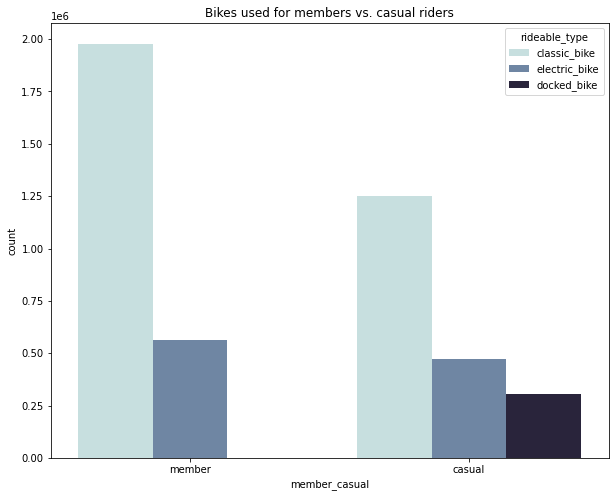

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Bikes used for members vs. casual riders")
sn.countplot(x='member_casual', hue='rideable_type', palette="ch:start=.2,rot=-.3", data = df1)
plt.ticklabel_format(axis='y')
plt.show()

In [ ]:
member_type = df1['member_casual'].value_counts()
member_type

member    2541680
casual    2032394
Name: member_casual, dtype: int64

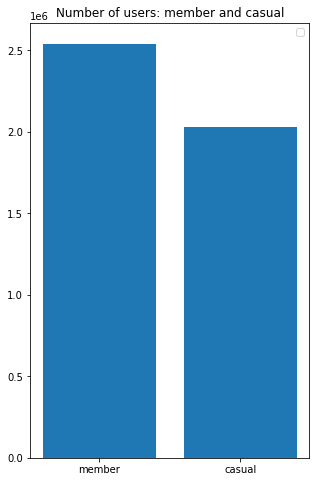

In [ ]:
plt.figure(figsize=(5,8))
plt.title("Number of users: member and casual")
plt.bar(member_type.index, member_type.values)
plt.ticklabel_format(axis='y')
plt.legend()

In [ ]:
n=10
Start_station = df1['start_station_name'].value_counts()
start = Start_station[:10 ]

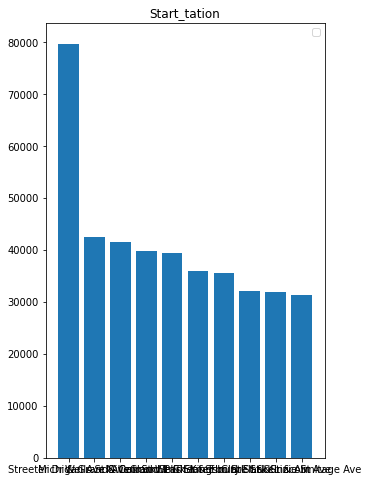

In [ ]:
plt.figure(figsize=(5,8))
plt.title("Start_tation")
plt.bar(start.index, start.values)
plt.ticklabel_format(axis='y')
plt.legend()

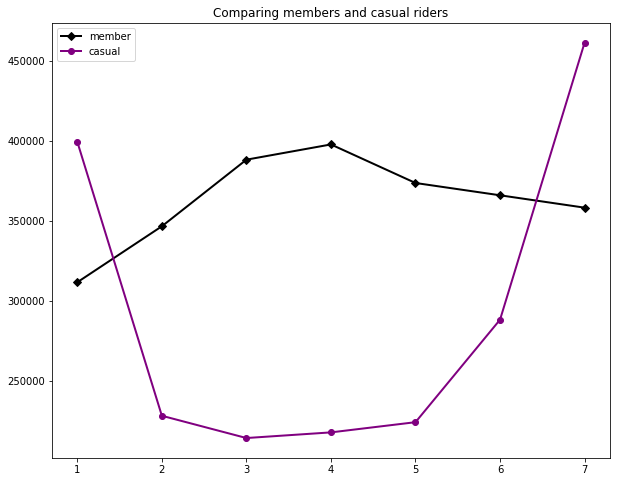

In [ ]:
plt.figure(figsize=(10,8),linewidth =10)
plt.plot(member_rides_per_day,marker = "D", color = "k",linewidth=2)
plt.plot(casual_rides_per_day, marker = "o",linewidth=2, color = "purple")
plt.xticks()
plt.title("Comparing members and casual riders")
plt.legend(['member','casual'])
labels=[('weekday')]
plt.show()

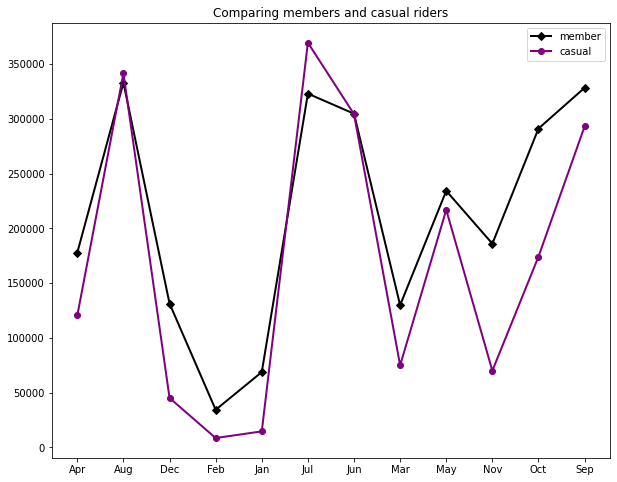

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(member_rides_per_month,marker = "D", color = "k",linewidth=2)
plt.plot(casual_rides_per_month,marker = "o",linewidth=2, color = "purple")
plt.xticks()
plt.title("Comparing members and casual riders")
plt.legend(['member','casual'])
labels=[('month')]
plt.show()

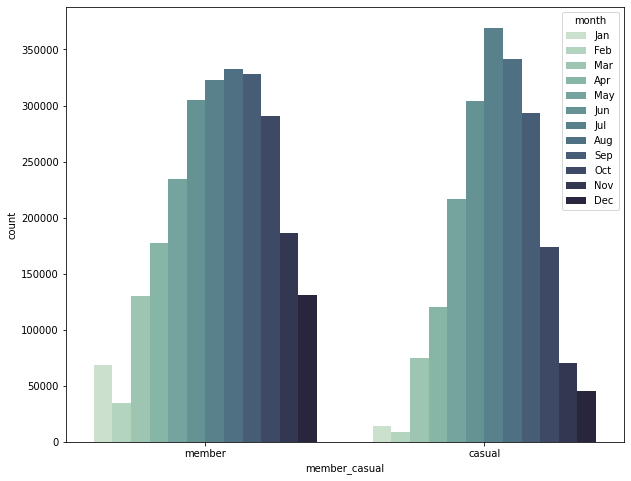

In [ ]:
plt.figure(figsize=(10,8))

sn.countplot(x='member_casual', hue='month', palette='ch:s=.25,rot=-.5', data=df1)

***Summary and Obsevations***


Most bikes used by both members and casual riders are classic

*  we have more classic bike rider for both casual and member
*  casual riders uses bike majorly on weekend, members use bike more during the week
*  Most casual riders ride on Saturday while most members ride on Wednesday
*  July has the most user for casual riders while Aug to sept has the most users for members

**Act**

Based on the analysis,eventhough there are more membership riders than casual riders,but as a company

* we can attract more casual users on the weekends to sign up for discounted memberships at least for the first year. According to the data, our membership capture rate potential is best done on Fridays and can be flexible through the weekend.

* With the expected surge in the numbers of ridership on weekends, there would need to be a bigger supply of bikes during the weekends.

*   With responsible use of funds, more electric bikes can be introduced for the public.

*  One way to incentivize current members is a referral program where there can be a points system that can be redeemed in the future for discounted rates on membership.
*   For casual users who use our service for more miles, we can incentivize by discounting rates of membership. We recommend to incentivize new members for rewards on bike use during weekdays.

*  Marketing department can assist in promotions for converting casual riders into members for bicycle use during weekdays.

*  Marketing can also help advertise more during the summer months encouraging bike use for members and casual riders by giving rewards/ points.

*   Memberships can be completed quickly and downloaded on the phone for casual riders. This way, new members will be able to use the bike immediately.
